In [7]:
import xscen as xs
import xarray as xr
import cartopy.crs as ccrs
from xscen.config import CONFIG
import figanos.matplotlib as fg
import matplotlib.pyplot as plt
fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "paths_obs.yml", "config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)

/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [8]:
pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])
pcat.df

id            type processing_level  \
0   ECMWF_ERA5-Land_NAM_reconstruction  reconstruction        extracted   
1       GovCan_RDRS_NAM_reconstruction  reconstruction        extracted   
2       GovCan_CaSR_NAM_reconstruction  reconstruction        extracted   
3         GovCan_AHCCD_CAN_station-tas     station-tas        extracted   
4          GovCan_AHCCD_CAN_station-pr      station-pr        extracted   
5   ECMWF_ERA5-Land_NAM_reconstruction  reconstruction       indicators   
6   ECMWF_ERA5-Land_NAM_reconstruction  reconstruction       indicators   
7          GovCan_AHCCD_CAN_station-pr      station-pr       indicators   
8          GovCan_AHCCD_CAN_station-pr      station-pr       indicators   
9         GovCan_AHCCD_CAN_station-tas     station-tas       indicators   
10        GovCan_AHCCD_CAN_station-tas     station-tas       indicators   
11      GovCan_CaSR_NAM_reconstruction  reconstruction       indicators   
12      GovCan_CaSR_NAM_reconstruction  reconstruction       indicators   
13      GovCan_RDRS_NAM_reconstruction  reconstruction       indicators   
14      GovCan_RDRS_NAM_reconstruction  reconstruction       indicators   
15  ECMWF_ERA5-Land_NAM_reconstruction  reconstruction      climatology   
16  ECMWF_ERA5-Land_NAM_reconstruction  reconstruction      climatology   
17         GovCan_AHCCD_CAN_station-pr      station-pr      climatology   
18         GovCan_AHCCD_CAN_station-pr      station-pr      climatology   
19        GovCan_AHCCD_CAN_station-tas     station-tas      climatology   
20        GovCan_AHCCD_CAN_station-tas     station-tas      climatology   
21      GovCan_CaSR_NAM_reconstruction  reconstruction      climatology   
22      GovCan_CaSR_NAM_reconstruction  reconstruction      climatology   
23      GovCan_RDRS_NAM_reconstruction  reconstruction      climatology   
24      GovCan_RDRS_NAM_reconstruction  reconstruction      climatology   

   bias_adjust_institution bias_adjust_project mip_era activity driving_model  \
0                      NaN                 NaN     NaN      NaN           NaN   
1                      NaN                 NaN     NaN      NaN           NaN   
2                      NaN                 NaN     NaN      NaN           NaN   
3                      NaN                 NaN     NaN      NaN           NaN   
4                      NaN                 NaN     NaN      NaN           NaN   
5                      NaN                 NaN     NaN      NaN           NaN   
6                      NaN                 NaN     NaN      NaN           NaN   
7                      NaN                 NaN     NaN      NaN           NaN   
8                      NaN                 NaN     NaN      NaN           NaN   
9                      NaN                 NaN     NaN      NaN           NaN   
10                     NaN                 NaN     NaN      NaN           NaN   
11                     NaN                 NaN     NaN      NaN           NaN   
12                     NaN                 NaN     NaN      NaN           NaN   
13                     NaN                 NaN     NaN      NaN           NaN   
14                     NaN                 NaN     NaN      NaN           NaN   
15                     NaN                 NaN     NaN      NaN           NaN   
16                     NaN                 NaN     NaN      NaN           NaN   
17                     NaN                 NaN     NaN      NaN           NaN   
18                     NaN                 NaN     NaN      NaN           NaN   
19                     NaN                 NaN     NaN      NaN           NaN   
20                     NaN                 NaN     NaN      NaN           NaN   
21                     NaN                 NaN     NaN      NaN           NaN   
22                     NaN                 NaN     NaN      NaN           NaN   
23                     NaN                 NaN     NaN      NaN           NaN   
24                     NaN                 NaN     NaN      

In [76]:
def plot(processing_level):    
    dict_ext= pcat.search(processing_level=processing_level).to_dataset_dict() # Getting all datasets with the given processing level from the catalog
    
    for id, ds in dict_ext.items(): # For each dataset
        if ds.attrs['cat:type'] == 'reconstruction': # Reconstruction datasets (i.e., gridded data) provide values for every grid point
            plotting_function = fg.gridmap
        else: # Otherwise, the dataset consists of point observations (e.g., weather stations), which only provide values at discrete locations
            plotting_function = fg.scattermap
            
        for var in ds.data_vars: # For each variable
            var_ds = ds[var] # Dataset for the current variable
            coords = var_ds.coords # Get the coordinates associated with this variable
            if 'lat' in coords and 'lon' in coords: # If the variable can be plotted on a 2D lat/lon plot
                
                if 'time' in var_ds.coords: # If the variable is defined in time, need to select a specific time to plot
                    ith_time = int(len(var_ds.time)/2) # The index of the time which will get plotted (we arbitrarily choose to plot the middle time)
                    var_ds = var_ds.isel(time=ith_time)
                    show_time = True
                else:
                    show_time = False
                
                if 'season' in var_ds.coords:  # If the variable is defined over seasons, make a subplot for each season
                    ax = plotting_function(
                        var_ds,
                        projection=ccrs.LambertConformal(),
                        fig_kw={"figsize": (20, 5)},
                        plot_kw={"col": "season"},
                        features=["coastline"],
                        show_time=show_time,
                        frame=False,
                        use_attrs={"suptitle": "description"},
                        enumerate_subplots=True
                    )
                else:
                    ax=plotting_function(var_ds, show_time=show_time, features=['coastline'])
                    ax.set_title(id, fontsize=14)

In [77]:
#plot(processing_level='extracted')

In [78]:
#plot(processing_level='indicators')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/usr/local/DEV/mambaforge/envs/xscen-0.12/lib/python3.12/site-packages/xarray/plot/facetgrid.py:220: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


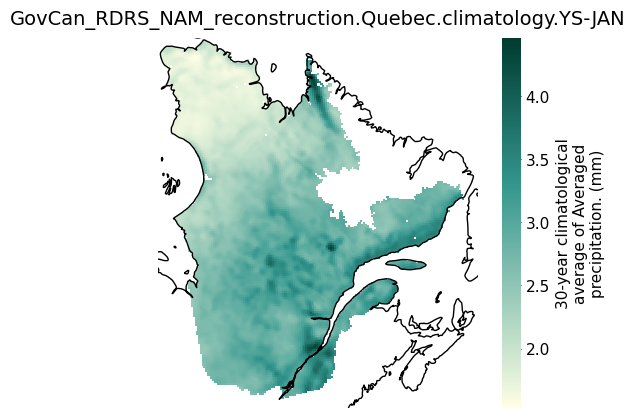

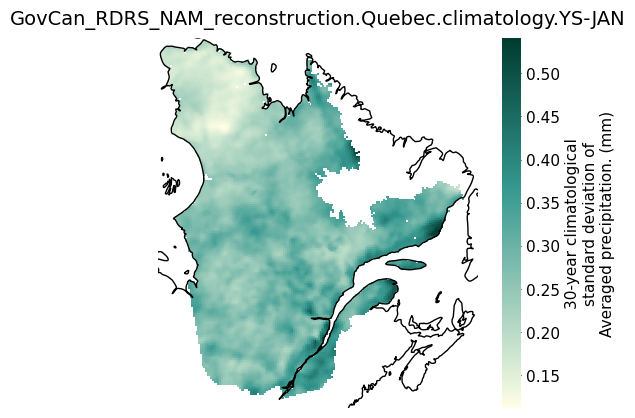

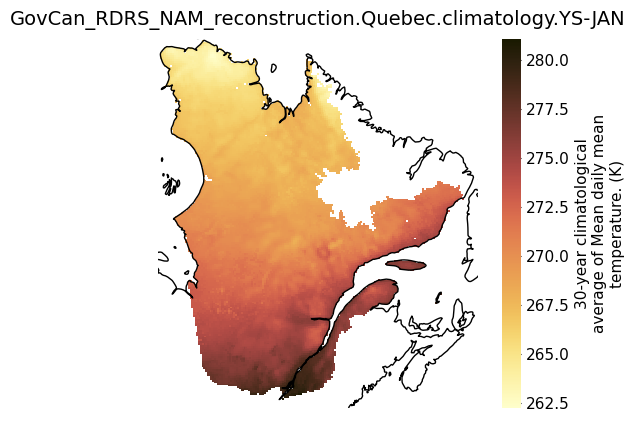

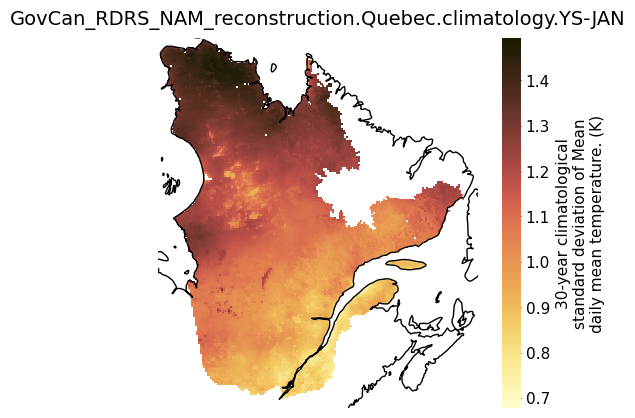

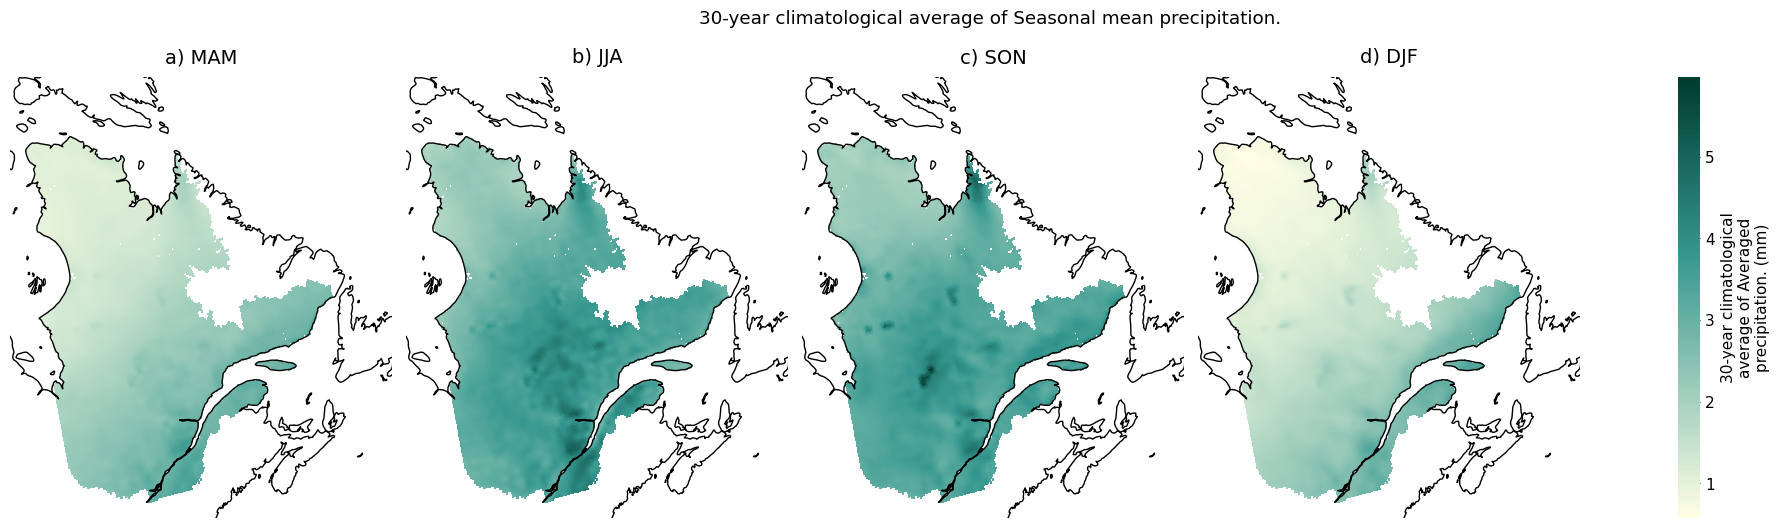

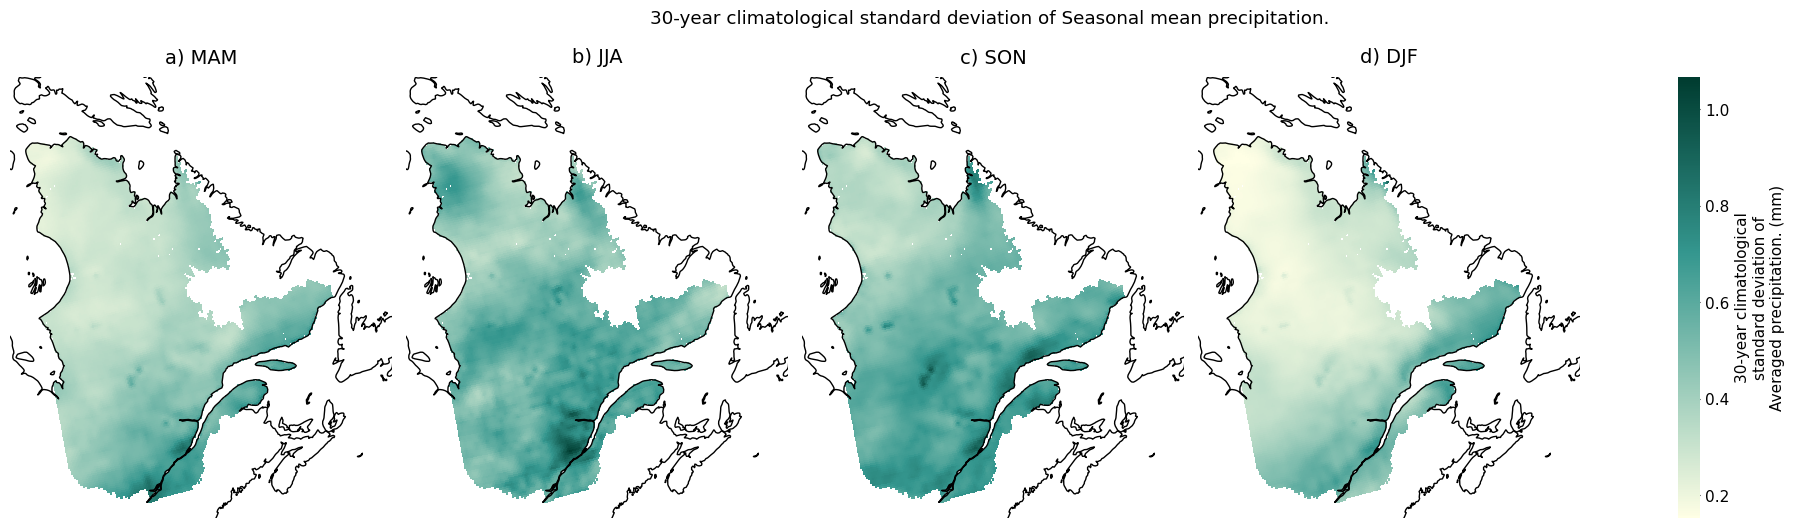

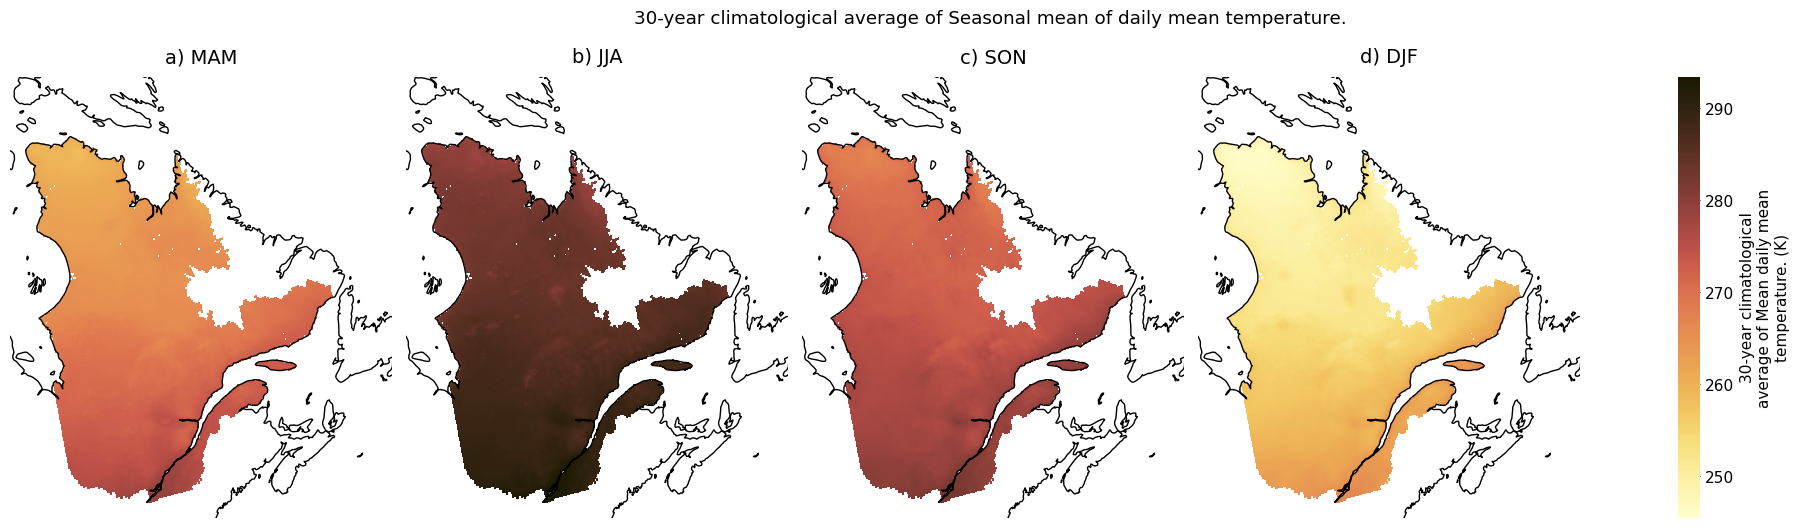

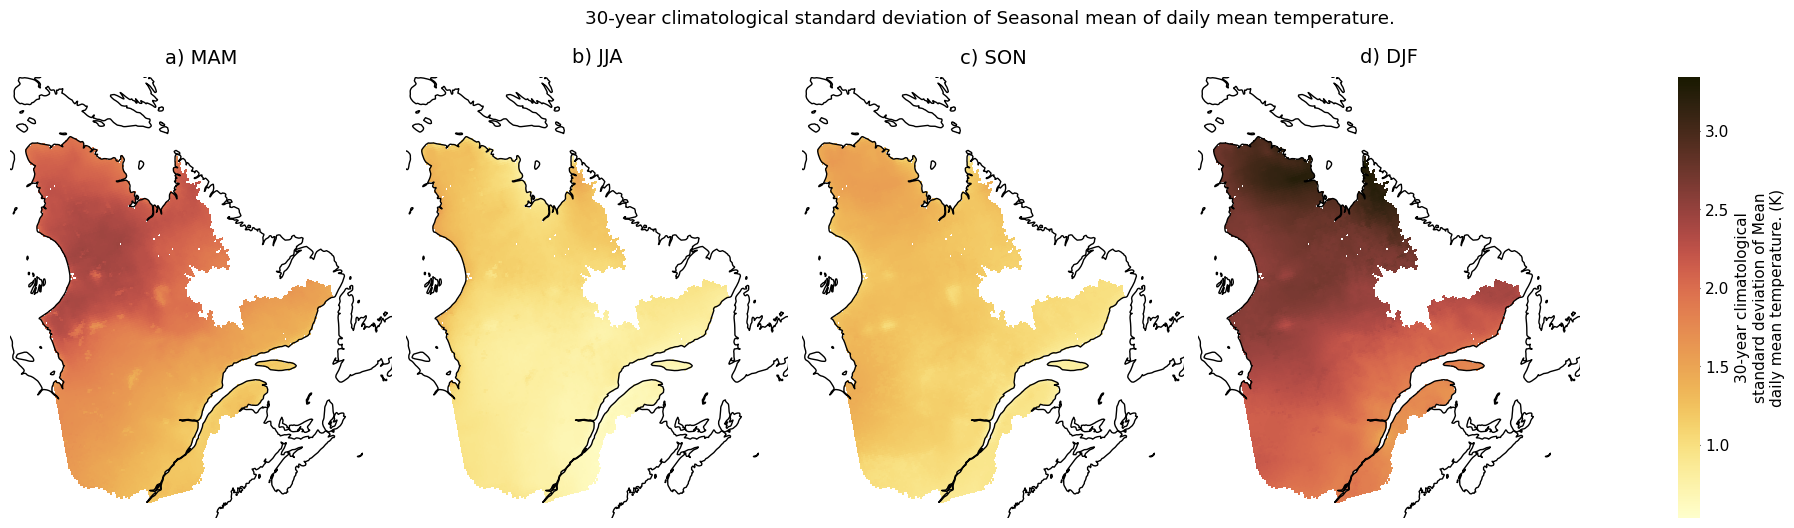

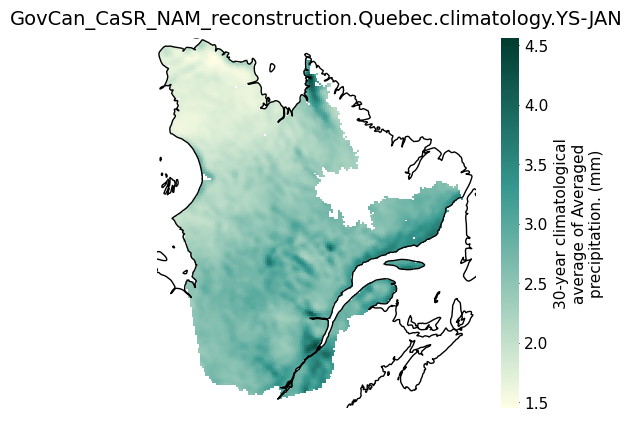

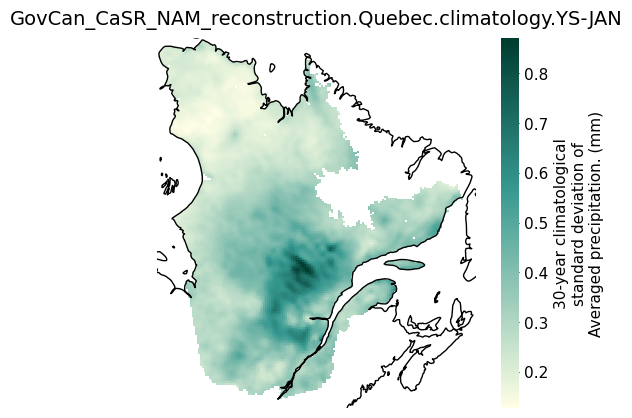

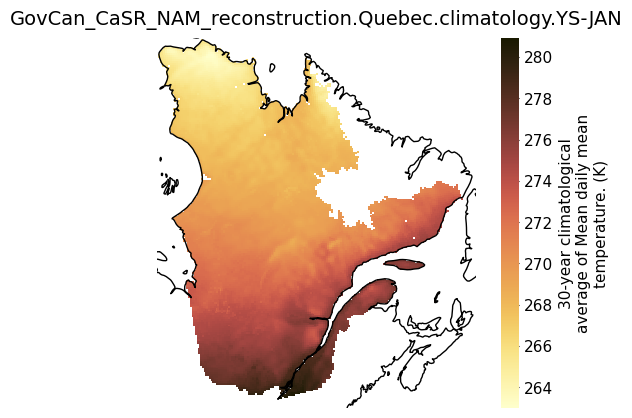

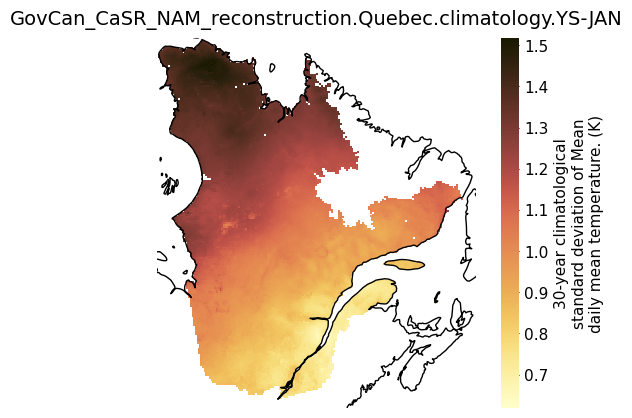

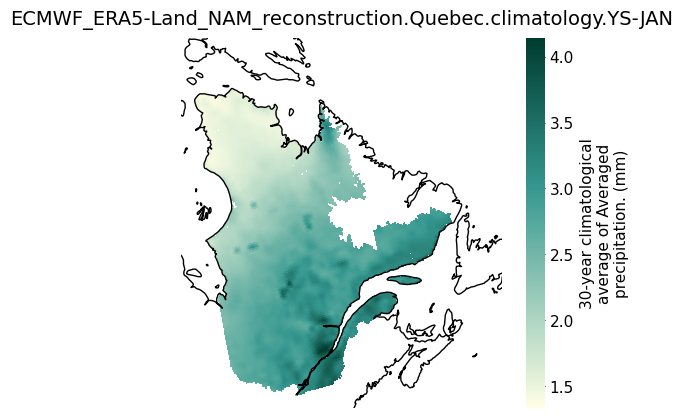

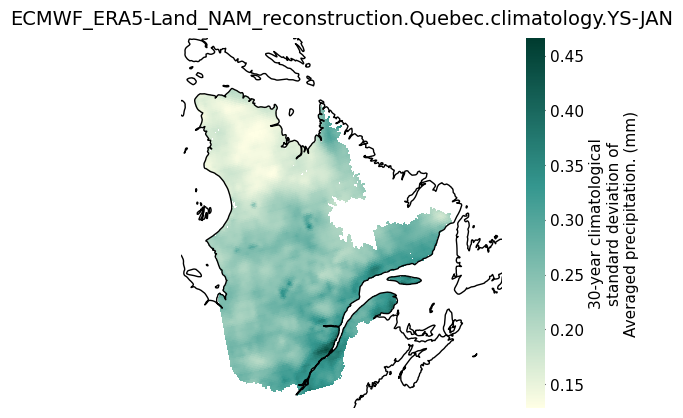

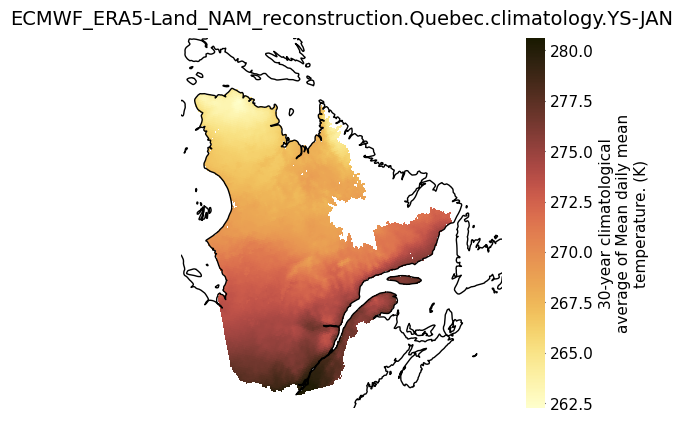

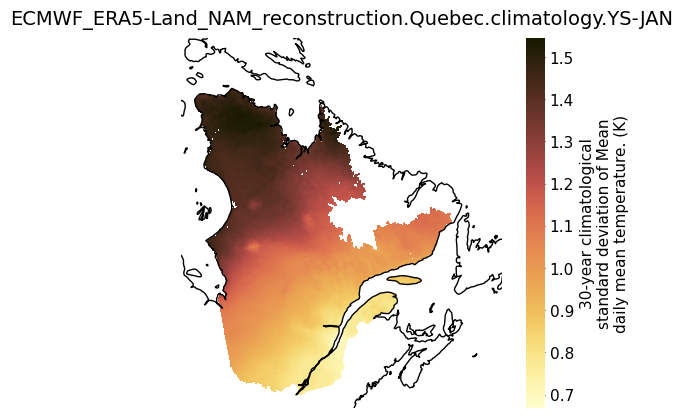

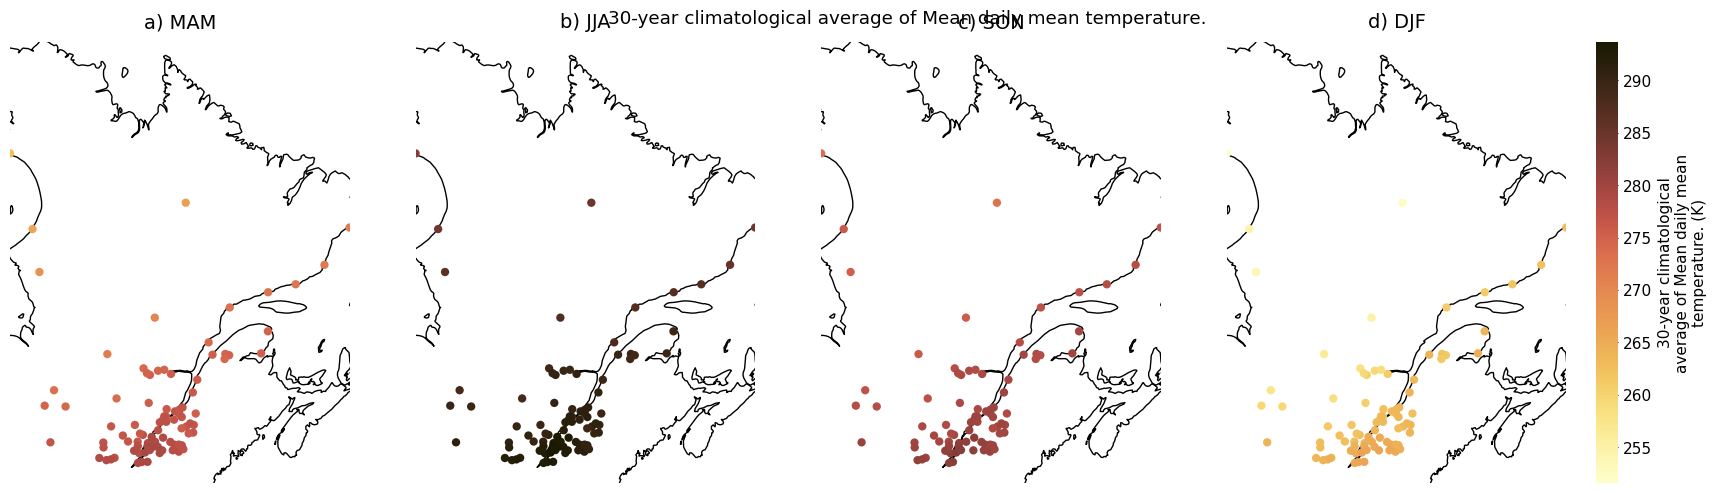

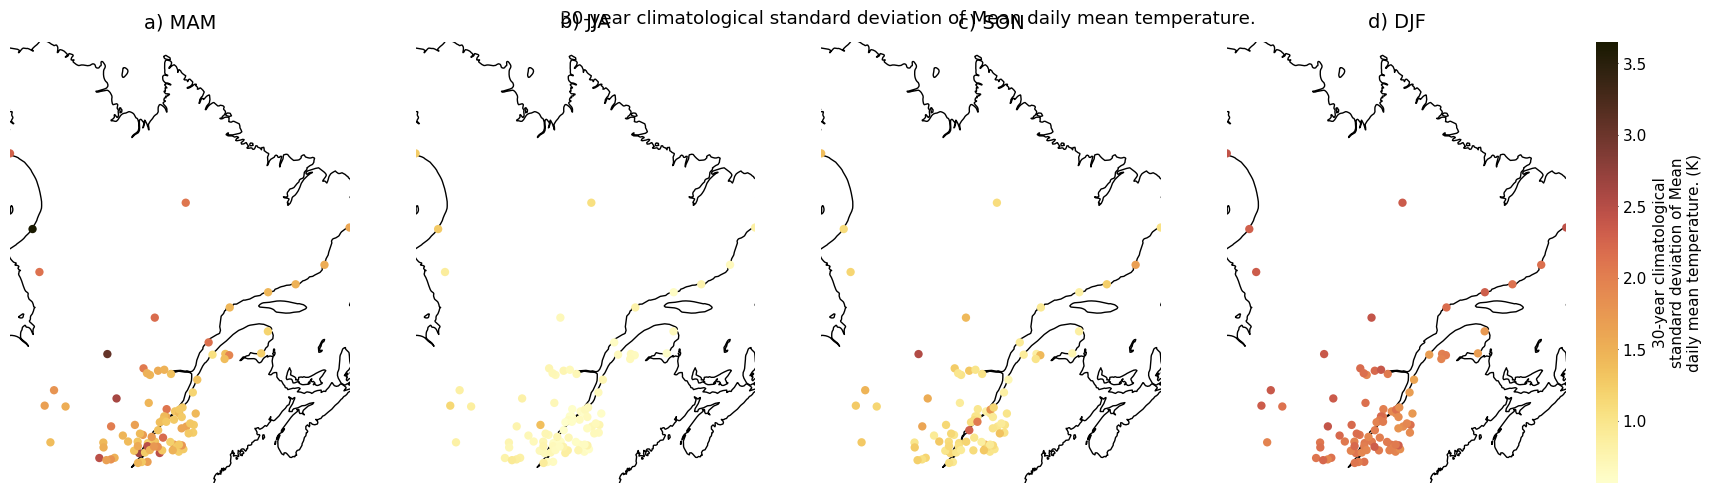

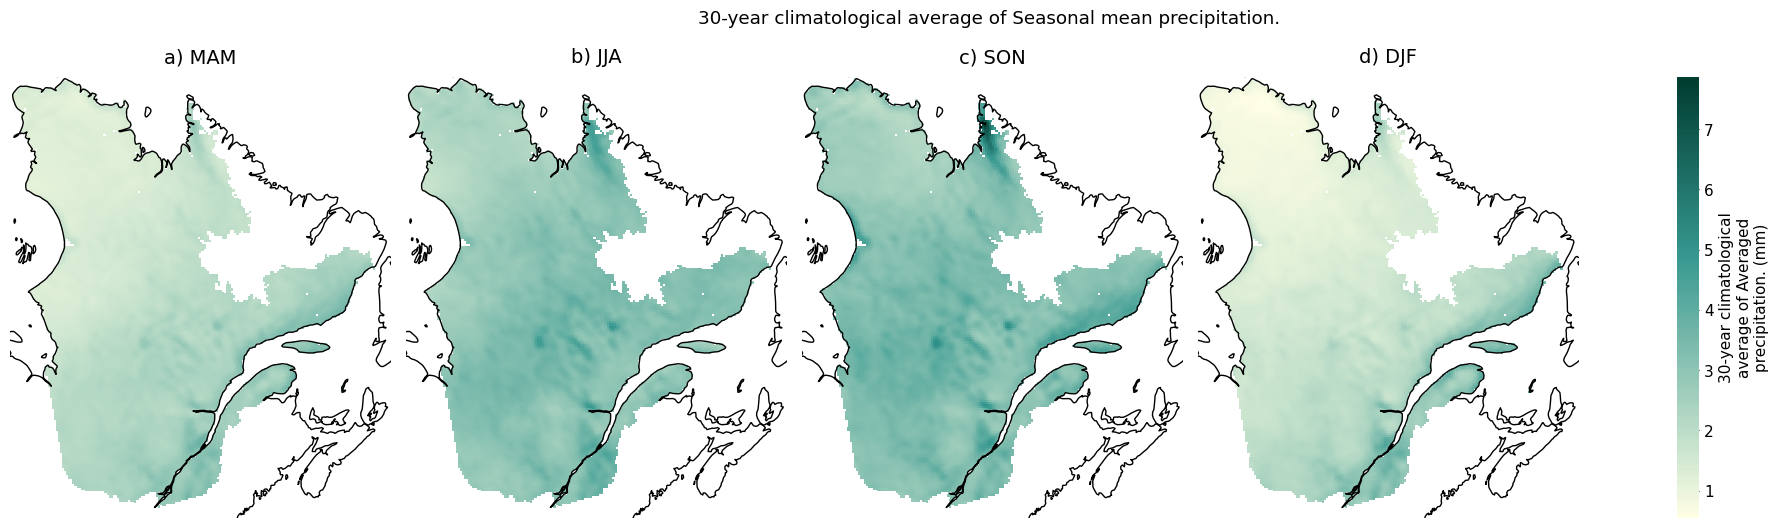

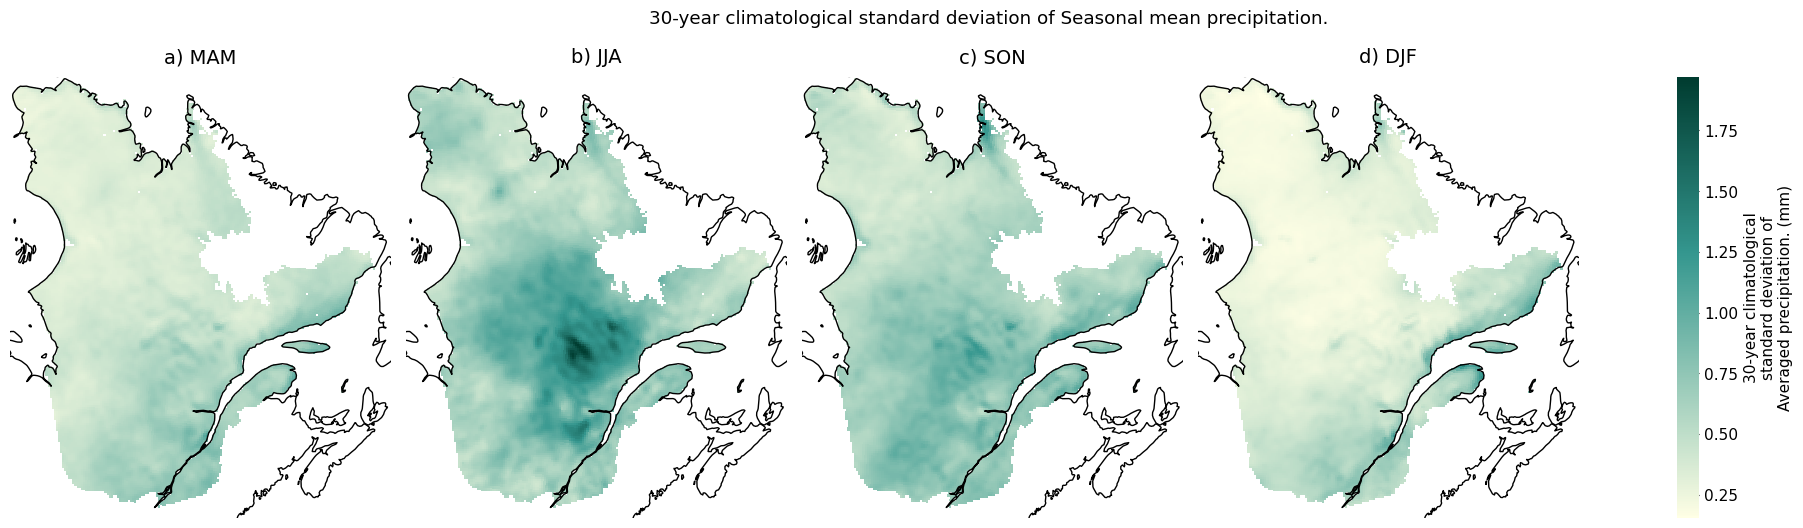

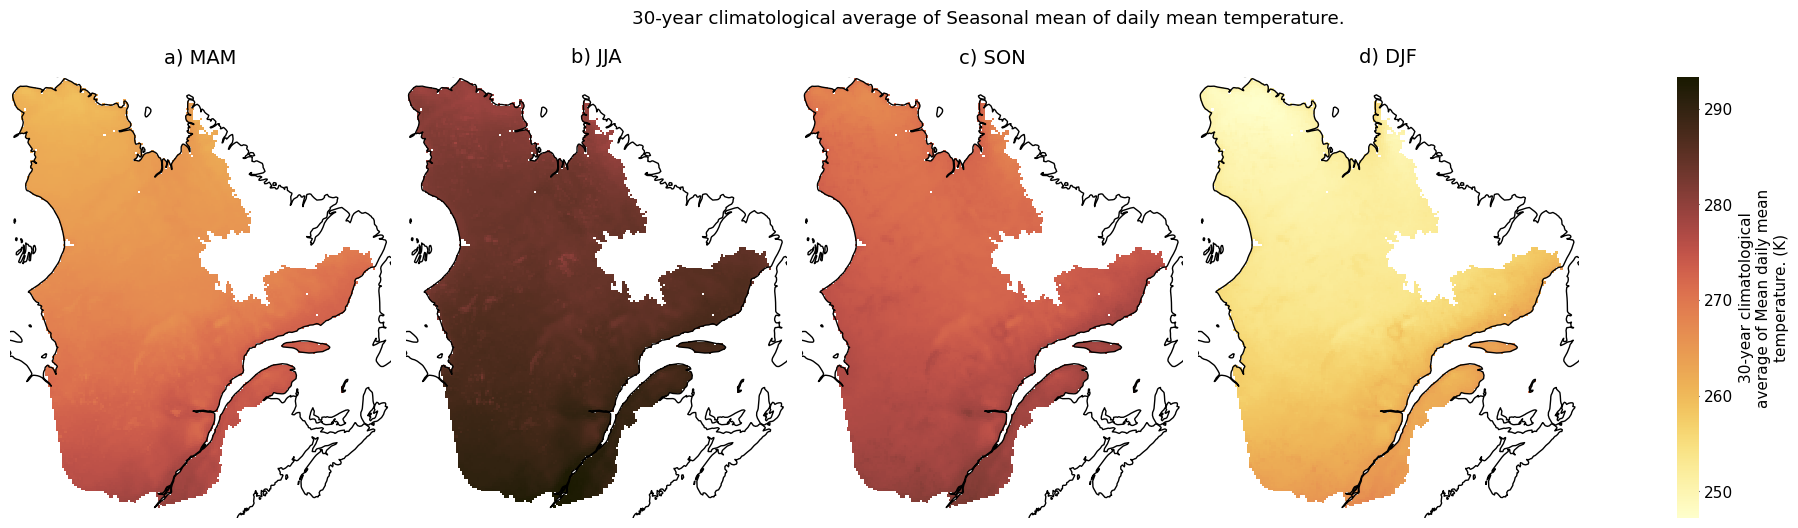

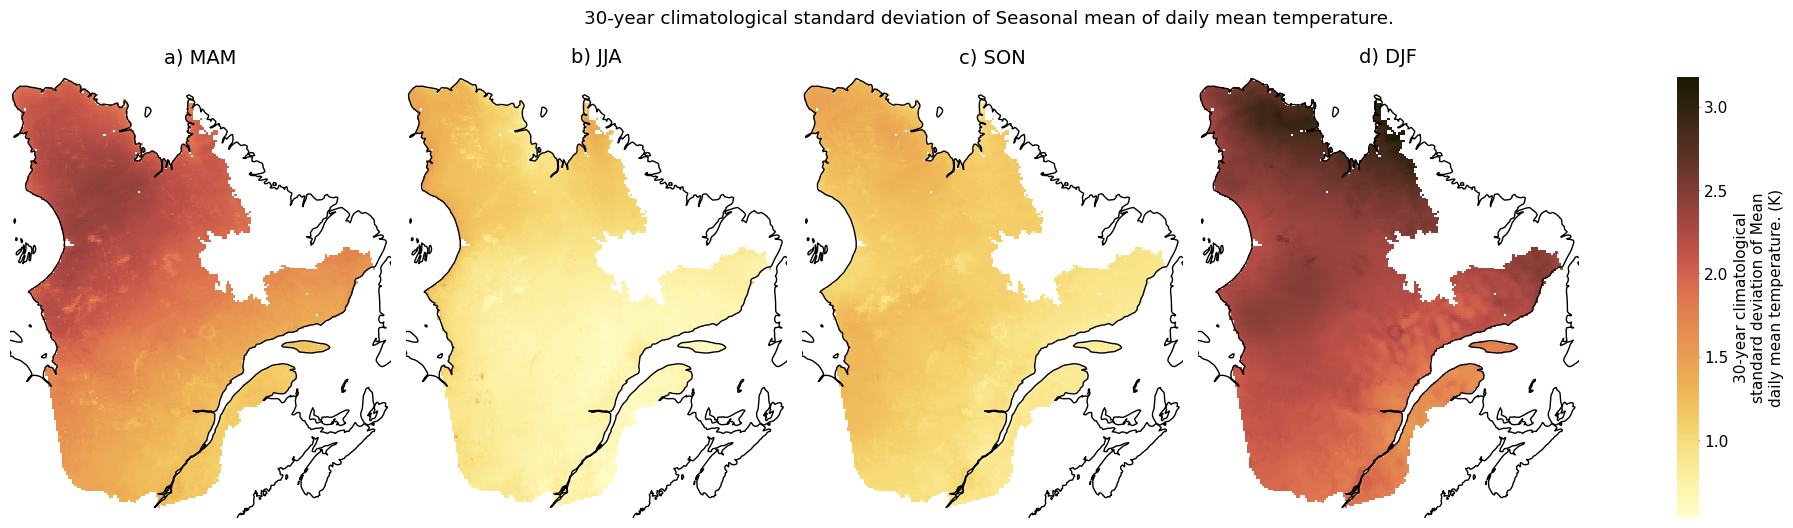

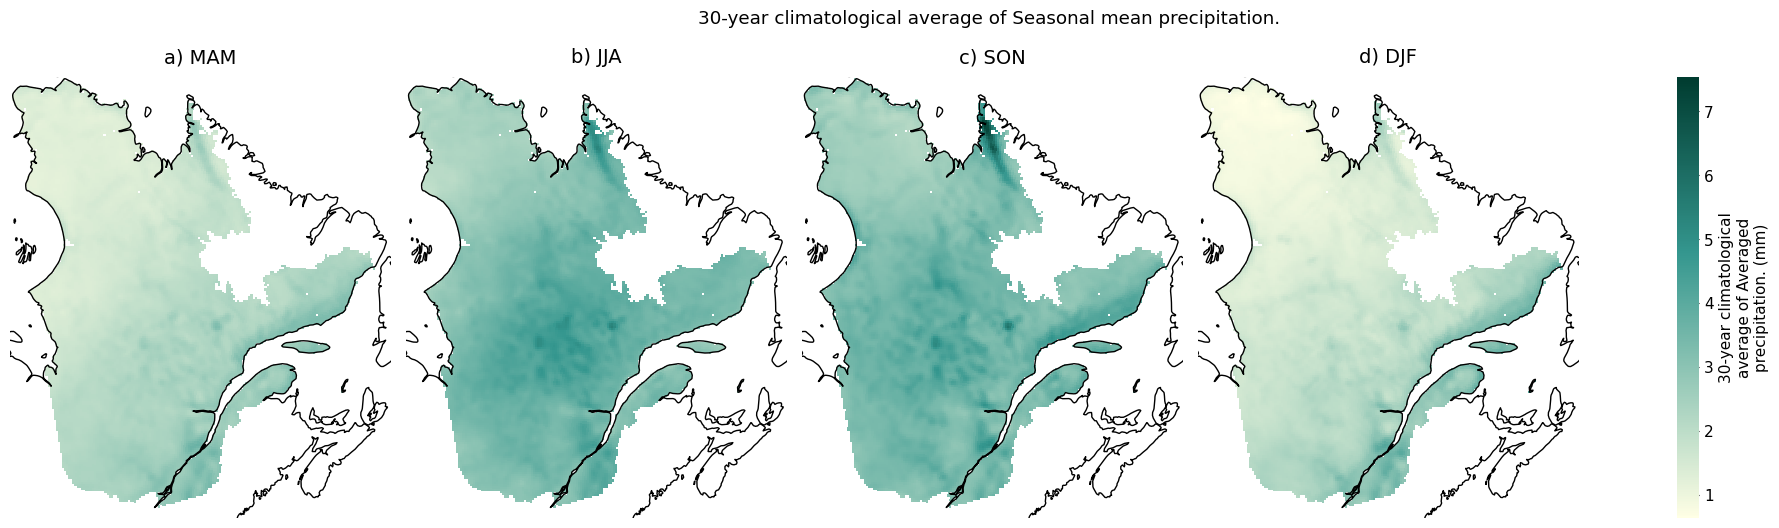

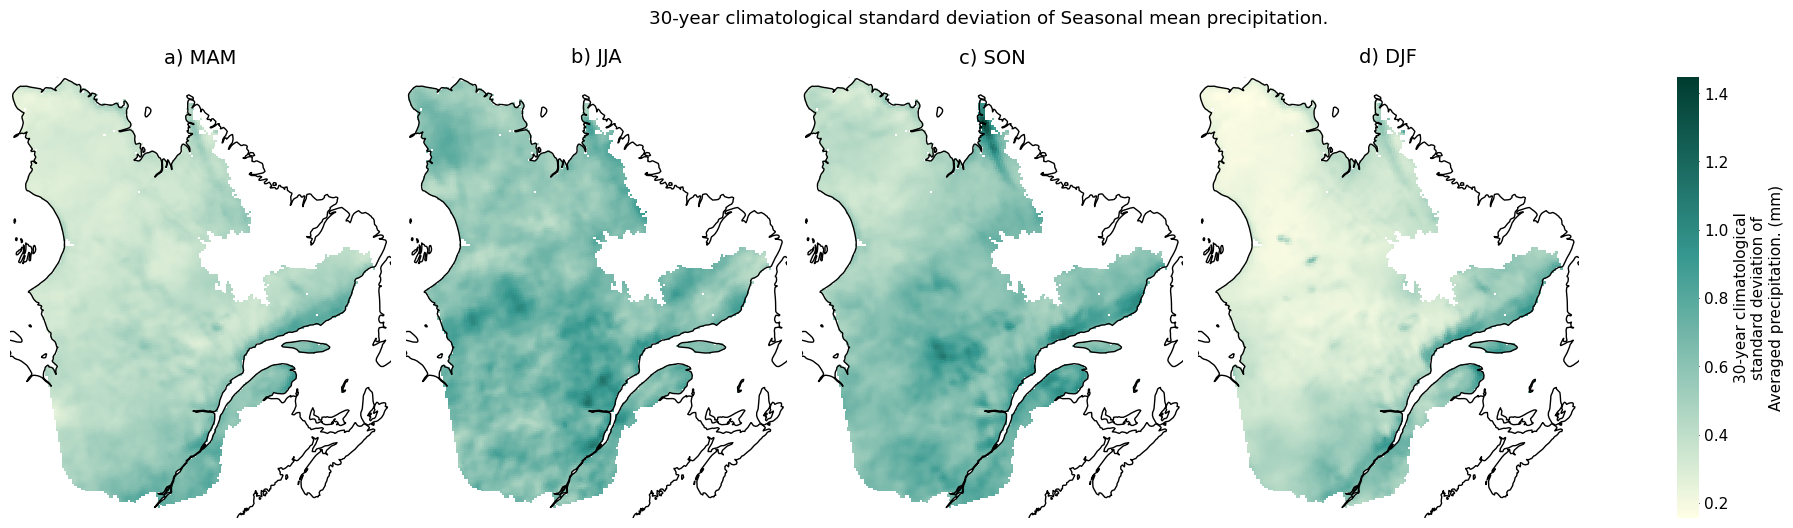

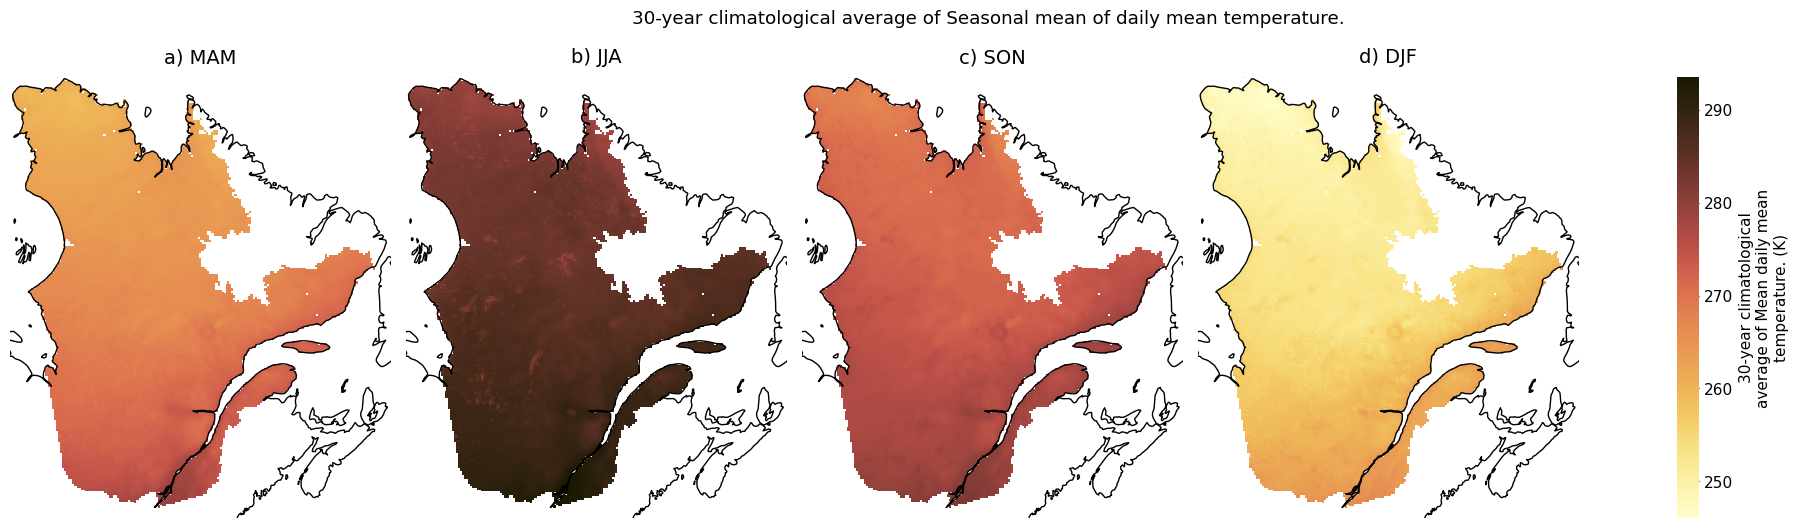

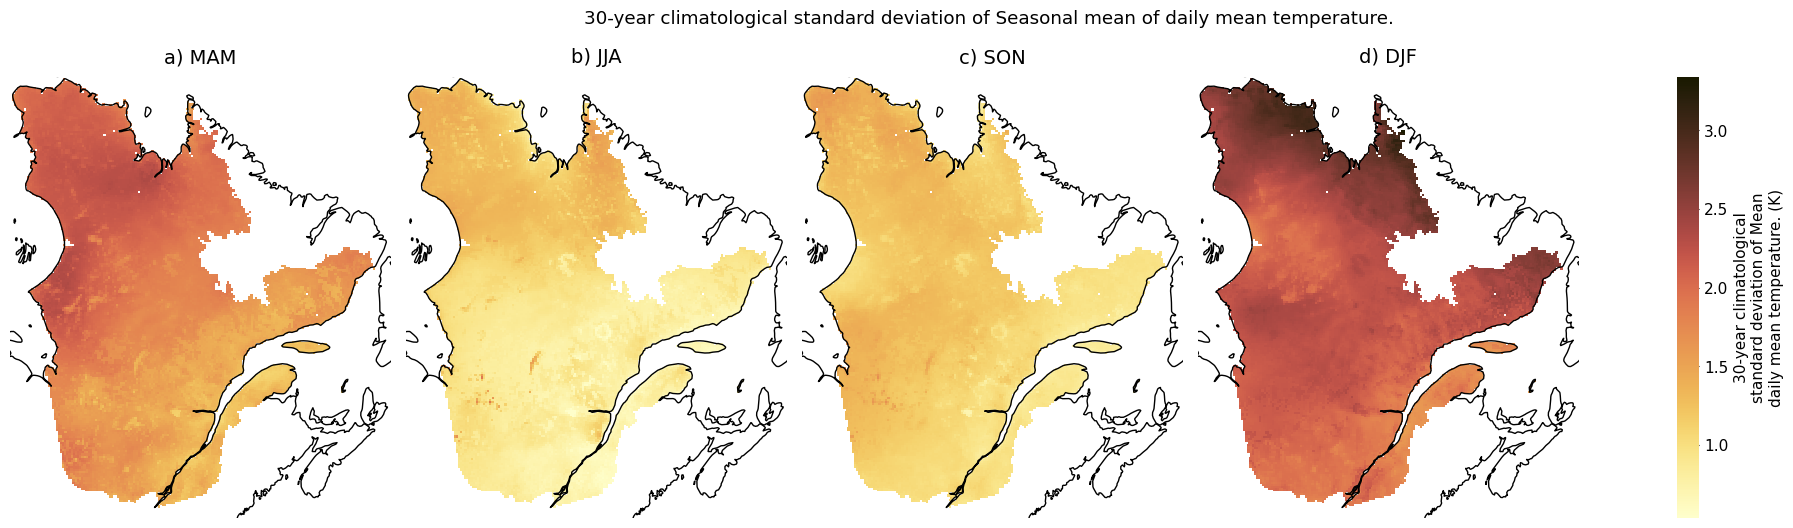

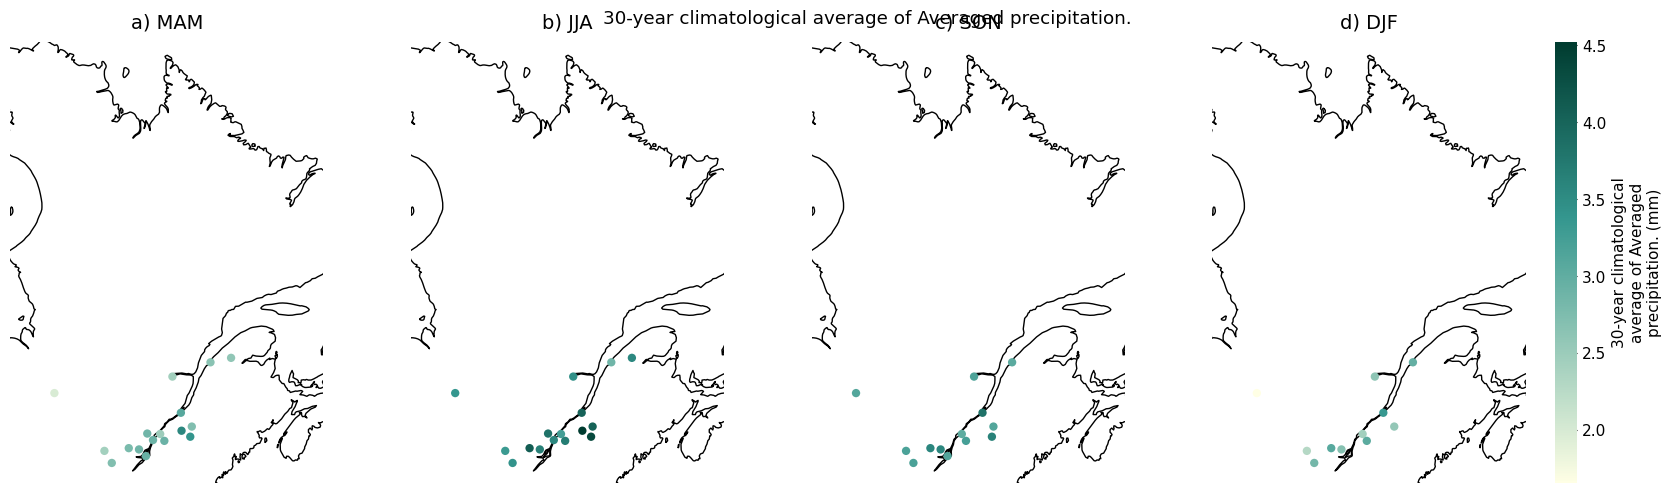

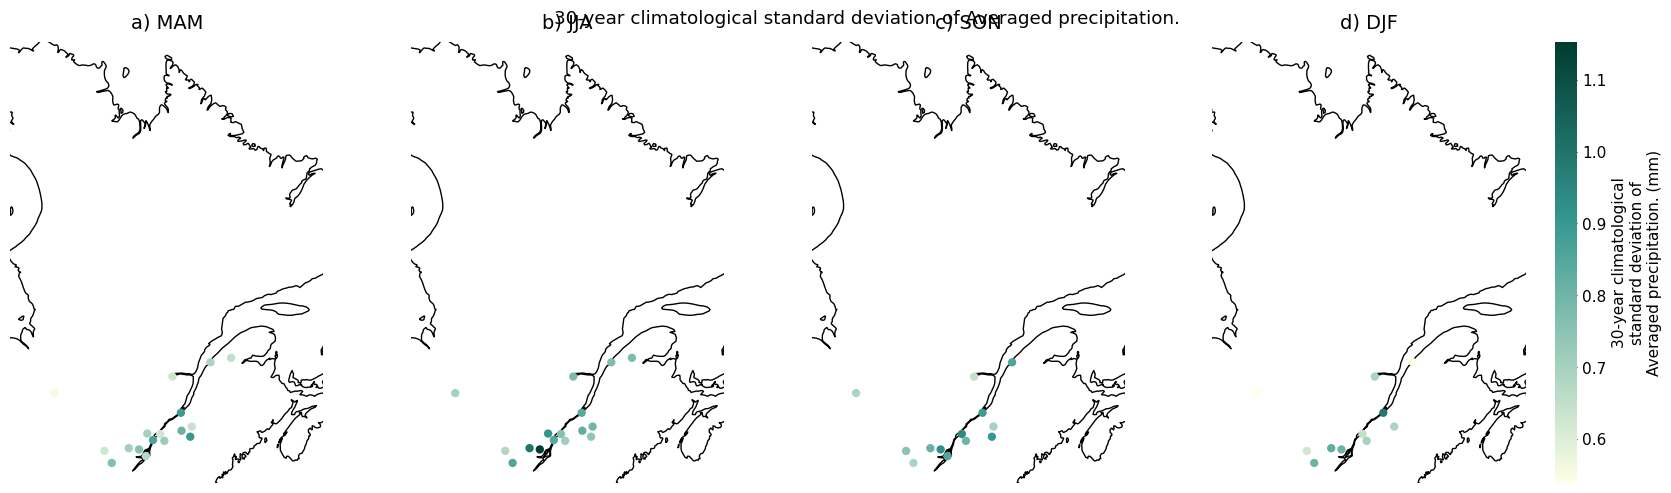

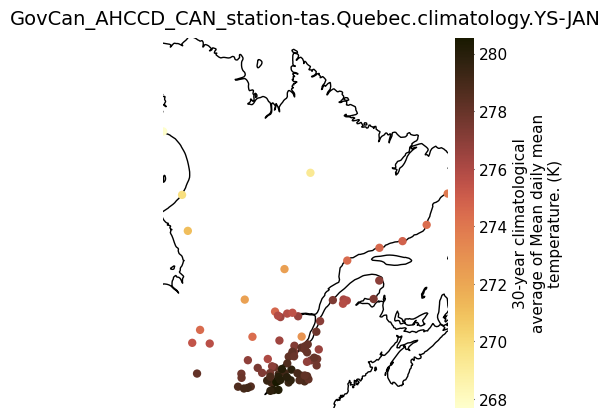

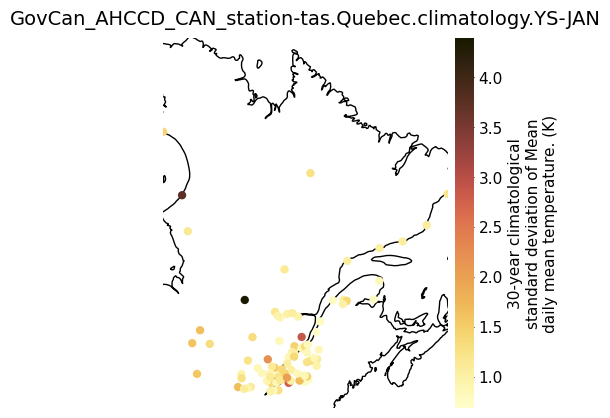

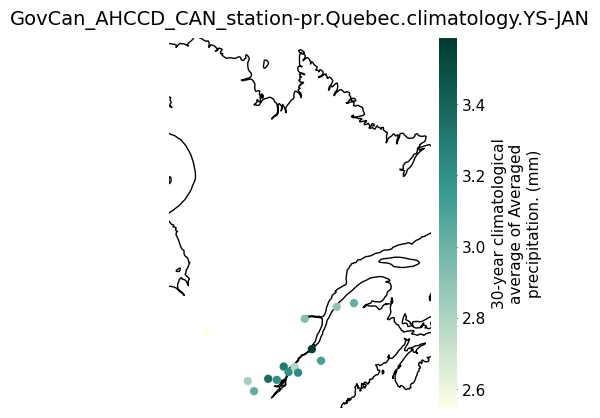

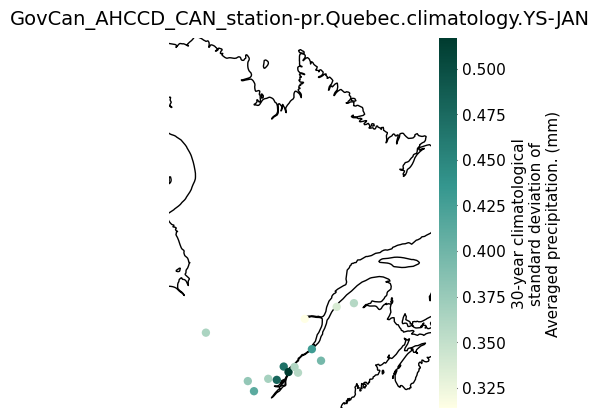

In [79]:
plot(processing_level='climatology')